## Single Link

In [1]:
import requests
import html5lib
from bs4 import BeautifulSoup as bs
import pandas as pd

In [2]:
import nltk

In [4]:
url_list = ["https://health.detik.com/fotohealth/d-6960788/hari-ini-jakarta-kota-kedua-terpolusi-di-dunia?_ga=2.198441327.179328315.1696333919-2147252824.1690441053",
            "https://news.detik.com/berita/d-6959008/kurangi-polusi-30-ribu-pohon-dibagikan-gratis-di-cfd-sudirman-thamrin?_ga=2.198441327.179328315.1696333919-2147252824.1690441053",
            "https://news.detik.com/berita/d-6957354/pemprov-dki-ungkap-108-gedung-sudah-pasang-water-mist-atasi-polusi-udara?_ga=2.198441327.179328315.1696333919-2147252824.1690441053",
            "https://news.detik.com/berita/d-6957301/pemprov-dki-sanksi-11-perusahaan-biang-kerok-polusi-4-disegel-sementara?_ga=2.36246880.179328315.1696333919-2147252824.1690441053",
            "https://news.detik.com/pemilu/d-6956890/megawati-sempat-batuk-di-rakernas-pdip-ini-alergi-karena-polusi-jakarta?_ga=2.36246880.179328315.1696333919-2147252824.1690441053",
            "https://news.detik.com/berita/d-6955209/angin-berembus-kencang-sore-ini-jakarta-keluar-dari-10-besar-kota-berpolusi?_ga=2.36246880.179328315.1696333919-2147252824.1690441053",
            "https://www.detik.com/sumbagsel/berita/d-6954483/keluh-warga-jambi-dampak-kabut-asap-mata-perih-sesak-napas",
            "https://finance.detik.com/foto-bisnis/d-6953689/tekan-polusi-jakarta-erick-thohir-mulai-program-tanam-100000-pohon?_ga=2.203102929.179328315.1696333919-2147252824.1690441053",
            "https://oto.detik.com/berita/d-6953858/polusi-udara-belum-teratasi-saatnya-kendaraan-pribadi-dibatasi?_ga=2.203102929.179328315.1696333919-2147252824.1690441053",
            "https://oto.detik.com/berita/d-6953833/bengkel-uji-emisi-belum-mampu-layani-puluhan-juta-kendaraan-di-jakarta?_ga=2.203102929.179328315.1696333919-2147252824.1690441053",
            "https://news.detik.com/berita/d-6952558/dinkes-dki-kasus-ispa-turun-7-di-pekan-ketiga-september?_ga=2.203102929.179328315.1696333919-2147252824.1690441053",
            "https://news.detik.com/berita/d-6952021/dlh-dki-ungkap-jaktim-daerah-dengan-indeks-pencemaran-udara-tertinggi?_ga=2.203102929.179328315.1696333919-2147252824.1690441053",
            "https://news.detik.com/berita/d-6951960/cegah-polusi-perkotaan-klhk-dan-pemkab-tanam-pohon-di-bogor?_ga=2.203102929.179328315.1696333919-2147252824.1690441053",
            "https://www.detik.com/edu/detikpedia/d-6949846/studi-terbaru-lebih-dari-28-miliar-orang-di-dunia-terpapar-polusi-udara-tiap-hari",
            "https://news.detik.com/detiknews/d-6945896/heru-budi-minta-pemasangan-water-mist-di-gedung-gedung-jakarta-digencarkan?_ga=2.26876157.179328315.1696333919-2147252824.1690441053",
            "https://health.detik.com/berita-detikhealth/d-6945524/idai-sebut-kasus-ispa-anak-meningkat-sampai-waiting-list-masuk-igd?_ga=2.26876157.179328315.1696333919-2147252824.1690441053",
            "https://news.detik.com/berita/d-6944846/pemerintah-perlu-dengarkan-saran-dpr-soal-penanganan-polusi-udara?_ga=2.26876157.179328315.1696333919-2147252824.1690441053",
            "https://news.detik.com/berita/d-6944693/pemprov-dki-pantau-pabrik-kelapa-sawit-jaktim-berpotensi-picu-polusi?_ga=2.26876157.179328315.1696333919-2147252824.1690441053",
            "https://health.detik.com/berita-detikhealth/d-6944562/polusi-dki-belum-reda-dokter-sebut-tren-anak-kena-ispa-nanjak-hingga-90-persen?_ga=2.26876157.179328315.1696333919-2147252824.1690441053",
            "https://www.detik.com/edu/detikpedia/d-6943813/10-negara-paling-ramah-lingkungan-di-dunia-polusi-emisi-karbon-sangat-rendah",
            "https://news.detik.com/detiktv/d-6943795/jokowi-sebut-beban-jakarta-sangat-berat-macet-banjir-hingga-polusi?_ga=2.26876157.179328315.1696333919-2147252824.1690441053",
            "https://health.detik.com/detiktv/d-6942971/sempat-membaik-kini-udara-jakarta-kembali-memburuk-versi-iq-air?_ga=2.26277373.179328315.1696333919-2147252824.1690441053",
            "https://www.detik.com/properti/berita/d-6940926/begini-jurus-pengembang-redam-polusi-udara",
            "https://news.detik.com/berita/d-6940834/dlh-dki-sanksi-pabrik-kelapa-sawit-yang-picu-polusi-udara?_ga=2.26277373.179328315.1696333919-2147252824.1690441053",
            "https://news.detik.com/berita/d-6939571/waka-komisi-ix-dpr-minta-presiden-pegang-komando-penanganan-polusi-udara?_ga=2.26277373.179328315.1696333919-2147252824.1690441053",
            "https://news.detik.com/berita/d-6939138/hujan-deras-guyur-jakarta?_ga=2.26277373.179328315.1696333919-2147252824.1690441053",
            "https://health.detik.com/fotohealth/d-6939056/bahaya-jakarta-kota-paling-polusi-di-dunia-hari-ini?_ga=2.26277373.179328315.1696333919-2147252824.1690441053",
            "https://health.detik.com/berita-detikhealth/d-6938579/polusi-masih-ungu-di-sejumlah-titik-jokowi-singgung-banyak-warga-dki-batuk-batuk?_ga=2.26277373.179328315.1696333919-2147252824.1690441053",
            "https://news.detik.com/detiktv/d-6938512/sederet-kritikan-jokowi-untuk-jakarta-macet-terus-kurang-pohon?_ga=2.4471411.179328315.1696333919-2147252824.1690441053",
            "https://news.detik.com/berita/d-6937929/jokowi-di-jakarta-pohon-kurang-kendaraan-banyak-jadi-banyak-orang-batuk?_ga=2.4471411.179328315.1696333919-2147252824.1690441053",
            "https://news.detik.com/berita/d-6933223/respons-dlh-dki-soal-usulan-status-polusi-udara-jadi-bencana?_ga=2.4471411.179328315.1696333919-2147252824.1690441053",
            "https://news.detik.com/berita/d-6932847/pemprov-dki-tutup-sementara-6-stockpile-batu-bara-diduga-pemicu-polusi?_ga=2.4471411.179328315.1696333919-2147252824.1690441053",
            "https://www.detik.com/properti/berita/d-6932603/polusi-udara-di-mana-mana-ini-daerah-yang-cocok-buat-ditinggali-di-ri",
            "https://news.detik.com/berita/d-6932728/pemprov-dki-11-gedung-swasta-di-jakarta-sudah-pasang-water-mist?_ga=2.4471411.179328315.1696333919-2147252824.1690441053",
            "https://health.detik.com/berita-detikhealth/d-6932093/kualitas-udara-pagi-ini-dki-tangerang-ya-gitu-deh?_ga=2.4471411.179328315.1696333919-2147252824.1690441053",
            "https://www.detik.com/edu/edutainment/d-6931286/perangi-polusi-mahasiswa-its-buat-alat-pendeteksi-udara-yang-bisa-lakukan-filtrasi",
            "https://news.detik.com/berita/d-6931511/psi-minta-polusi-udara-ditetapkan-sebagai-bencana-ini-kata-pemprov-dki?_ga=2.4471411.179328315.1696333919-2147252824.1690441053",
            "https://health.detik.com/fotohealth/d-6931092/polusi-udara-sebabkan-serangan-asma-peran-puskesmas-perlu-ditingkatkan?_ga=2.202503889.179328315.1696333919-2147252824.1690441053",
            "https://news.detik.com/berita/d-6930632/berapa-lama-efek-bilas-polusi-udara-di-langit-jakarta-ini-kata-bnpb?_ga=2.202503889.179328315.1696333919-2147252824.1690441053",
            "https://finance.detik.com/energi/d-6930441/pln-klaim-pltu-di-sekitar-jakarta-minim-polusi?_ga=2.202503889.179328315.1696333919-2147252824.1690441053",
            "https://news.detik.com/berita/d-6930122/kenneth-dprd-dki-dorong-heru-budi-keluarkan-aturan-soal-pasang-water-mist?_ga=2.202503889.179328315.1696333919-2147252824.1690441053",
            "https://news.detik.com/berita/d-6929899/psi-minta-pemprov-dki-tetapkan-status-polusi-udara-sebagai-bencana?_ga=2.202503889.179328315.1696333919-2147252824.1690441053",
            "https://news.detik.com/berita/d-6929817/hanya-dua-hari-langit-biru-awan-putih-bertahan-di-jakarta?_ga=2.202503889.179328315.1696333919-2147252824.1690441053",
            "https://news.detik.com/berita/d-6929148/dlh-dki-segel-cerobong-pabrik-baja-diduga-penyebab-polusi-udara?_ga=2.202503889.179328315.1696333919-2147252824.1690441053",
            "https://news.detik.com/berita/d-6929025/langit-jakarta-balik-lagi-jadi-kelabu-bmkg-kecepatan-angin-lambat?_ga=2.202503889.179328315.1696333919-2147252824.1690441053"
            ]

teks1 = ''
for url in url_list:
    req = requests.get(url)
    soup = bs(req.content, 'html5lib')

    paragraph = soup.findAll('p')
    text = []
    for p in paragraph:
        text.append(p.text)
    teks1 += ' '.join(text)

print(teks1)

Jakarta - Indeks Kualitas Udara (AQI) Jakarta pada Senin (2/10) pukul 10.00 WIB sebesar 163. Jakarta pun masuk peringkat ke-2 kota di dunia terpolusi di dunia.Hari bebas kendaraan bermotor (HBKB) atau car free day (CFD) di kawasan Jalan Sudirman-MH Thamrin, Jakarta, diwarnai bagi-bagi puluhan ribu pohon gratis pagi ini. Bagi-bagi pohon ini dilakukan untuk membantu mengurangi polusi udara di Jakarta. Pantauan detikcom di Bundaran HI, Jakarta Pusat, Minggu (1/10/2023), warga terlihat antusias menyerbu lokasi bagi-bagi pohon. Bahkan banyak yang mengambil lebih dari satu pohon. Pohon yang dibagikan itu terdiri atas berbagai jenis, seperti pohon citrus dan pohon buah. Salah satu warga, Sanya, mengaku kaget saat melihat yang bagi-bagi pohon di kawasan bundaran HI. Tanpa berpikir panjang, ia langsung mencari titik lokasi bagi-bagi pohon dan mengambil beberapa pohon bersama anak perempuannya. 
ADVERTISEMENT
 
SCROLL TO CONTINUE WITH CONTENT
 "Baru kali ini ikut CFD, sekalian jalan, tiba-tiba a

In [8]:
import re
from nltk.corpus import stopwords

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove extra spaces
    text = re.sub(' +', ' ', text)

    # Tokenize text into individual words
    words = text.split()

    # Remove stop words
    stop_words = ['\n', 'a. ', 'b. ', 'c. ', 'd. ', 'e. ', 'f. ', 'g. ','a.','b.','c.','d.','e.', 'f.', 'g.', '|',
                 '1. ', '2. ', '3. ', '4. ', '5. ', '6. ', '7. ', '8. ', '9. ', '»', 'ADVERTISEMENT']
    words = [word for word in words if word not in stop_words]

    # Join the processed words back into a single text
    processed_text = ' '.join(words)

    return processed_text

text_siap = preprocess_text(teks1)

In [9]:
text_siap

'jakarta - indeks kualitas udara (aqi) jakarta pada senin (2/10) pukul 10.00 wib sebesar 163. jakarta pun masuk peringkat ke-2 kota di dunia terpolusi di dunia.hari bebas kendaraan bermotor (hbkb) atau car free day (cfd) di kawasan jalan sudirman-mh thamrin, jakarta, diwarnai bagi-bagi puluhan ribu pohon gratis pagi ini. bagi-bagi pohon ini dilakukan untuk membantu mengurangi polusi udara di jakarta. pantauan detikcom di bundaran hi, jakarta pusat, minggu (1/10/2023), warga terlihat antusias menyerbu lokasi bagi-bagi pohon. bahkan banyak yang mengambil lebih dari satu pohon. pohon yang dibagikan itu terdiri atas berbagai jenis, seperti pohon citrus dan pohon buah. salah satu warga, sanya, mengaku kaget saat melihat yang bagi-bagi pohon di kawasan bundaran hi. tanpa berpikir panjang, ia langsung mencari titik lokasi bagi-bagi pohon dan mengambil beberapa pohon bersama anak perempuannya. advertisement scroll to continue with content "baru kali ini ikut cfd, sekalian jalan, tiba-tiba ada 

In [ ]:
#link = input("Masukkan link artikel: ")
req = requests.get(link)
soup = bs(req.content, 'html5lib')

Masukkan link artikel: https://www.mastah.org/cara-membuat-bom/


In [ ]:
#paragraphs = soup.findAll('p')

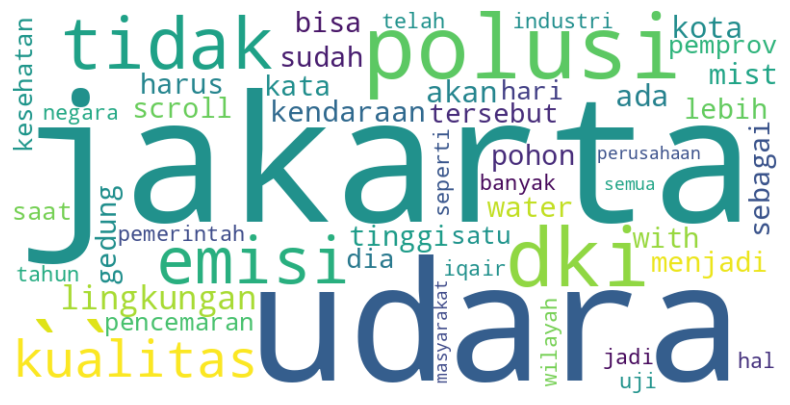

In [10]:
from nltk import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Tokenize the text
token_words = word_tokenize(text_siap)

# Define a list of common words to remove in Indonesian
common_words_to_remove = [
    'dan', 'atau', 'serta', 'tetapi', 'namun', 'sebab', 'karena', 'oleh karena itu', 'hingga', 'sampai',
    'di', 'ke', 'dari', 'untuk', 'pada', 'oleh', 'dengan', 'tanpa', 'sejak', 'selama', 'menurut', 'dalam',
    'yang', 'ini', ',', 'itu', 'juga', '', ')', 'mengatakan', "(", "adalah","advertisement", "continue","''",
    "%", ".", ":", "to", "content","' '"]

# Remove common words from token_words
filtered_words = [word for word in token_words if word.lower() not in common_words_to_remove]

# Calculate word frequencies
freq_dist = FreqDist(filtered_words)

# Set the number of words you want to include in the word cloud based on their frequencies
num_words_to_include = 50  # Adjust this as needed

# Get the most common words
most_common_words = freq_dist.most_common(num_words_to_include)

# Create a dictionary with word frequencies for word cloud
word_cloud_data = {word: freq for word, freq in most_common_words}

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_cloud_data)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
